# Target Mean Encoding Selection using Feature-Engine by `Mr. Harshit Dawar!`

In [1]:
# Loading the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from feature_engine.selection import SelectByTargetMeanPerformance

In [2]:
# Loading the Data

data = pd.read_csv("../../ds/Titanic_Dataset.csv")

In [3]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
data.drop("Cabin", axis = 1, inplace = True)

In [5]:
data = data.dropna()

In [6]:
data.shape

(712, 11)

In [7]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
data = data.drop(["Name", "Ticket"], axis = 1)

In [9]:
X = data.drop("Survived", axis = 1)
y = data.Survived

In [10]:
# Creating a Feature Selector for the work!

Feature_Selector = SelectByTargetMeanPerformance(variables = None,
                                                 scoring = "roc_auc_score",
                                                 cv = 5, # Cross Validation!
                                                 threshold = 0.65, # Metrics Value below which the features will be dropped
                                                 strategy="equal_frequency")

In [11]:
# Fitting the data to the Feature Selector!

Feature_Selector.fit(X, y)

SelectByTargetMeanPerformance(cv=5, strategy='equal_frequency', threshold=0.65,
                              variables=['PassengerId', 'Pclass', 'Sex', 'Age',
                                         'SibSp', 'Parch', 'Fare', 'Embarked'])

In [12]:
# Printing the Features

Feature_Selector.feature_performance_

{'PassengerId': 0.516481755065343,
 'Pclass': 0.6723341240577163,
 'Sex': 0.7632028109990789,
 'Age': 0.5428662853356319,
 'SibSp': 0.5183284225716569,
 'Parch': 0.5275336215024123,
 'Fare': 0.6857494135649764,
 'Embarked': 0.5838550364922831}

In [13]:
# Variables that are treated as Categorical by the Feature Selector

Feature_Selector.variables_categorical_

['Sex', 'Embarked']

In [14]:
# Variables that are treated as Numerical by the Feature Selector

Feature_Selector.variables_numerical_

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

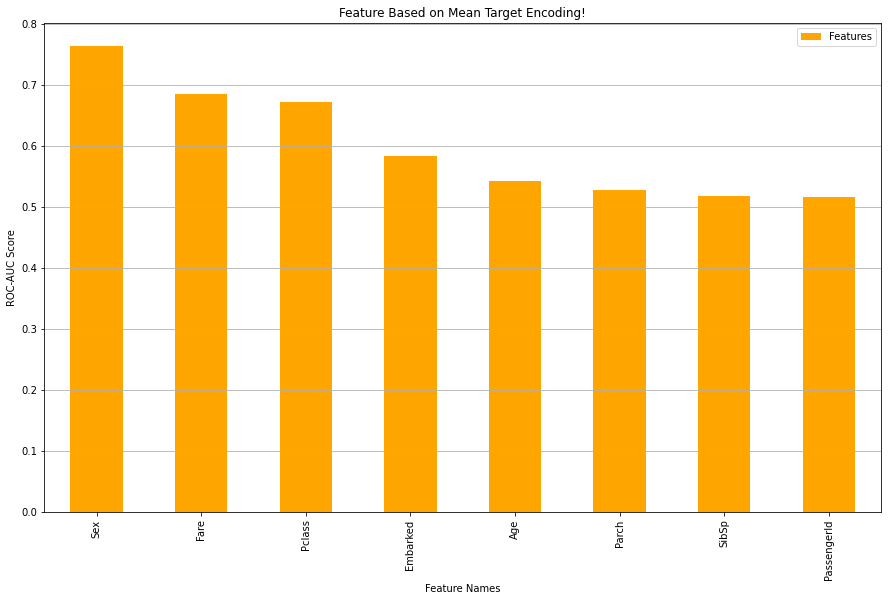

In [15]:
pd.Series(Feature_Selector.feature_performance_).sort_values(ascending = False).plot.bar(figsize = (15, 9),
                                                                                         color = "orange")
plt.title("Feature Based on Mean Target Encoding!")
plt.ylabel("ROC-AUC Score")
plt.legend(["Features"])
plt.xlabel("Feature Names")
plt.grid(axis = "y")
plt.show()

In [16]:
Feature_Selector.features_to_drop_

['PassengerId', 'Age', 'SibSp', 'Parch', 'Embarked']

In [17]:
# Removing the Features below the Threshold!
X = Feature_Selector.transform(X)

In [18]:
X.head()

,Pclass,Sex,Fare
0,3,male,7.2500
1,1,female,71.2833
2,3,female,7.9250
3,1,female,53.1000
4,3,male,8.0500


# Congratulations, you have learned a new way to select Features!